# Imports 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Data and Preprocessing

In [42]:
# df = pd.read_csv('student-mat.csv', delimiter=';')
df2 = pd.read_csv('student-por.csv', delimiter=';')

In [43]:
# df.head()
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [44]:
# df = df.replace({'Mjob': {'at_home': 0, 'teacher': 1, 'services': 2, 'health': 3, 'other': 4}})
# df = df.replace({'G3': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}})
# df = df.replace({'G3': {10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1}})

df2 = df2.replace({'Mjob': {'at_home': 0, 'teacher': 1, 'services': 2, 'health': 3, 'other': 4}})
df2 = df2.replace({'G3': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}})
df2 = df2.replace({'G3': {10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1}})


In [7]:
df.head()
# df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,0,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,0,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,0,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,3,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,4,other,...,4,3,2,1,2,5,4,6,10,1


In [45]:
from sklearn.model_selection import GridSearchCV

feature_cols = ['G1', 'G2', 'absences', 'Mjob', 'goout']
# feature_cols = ['G1','G2','Mjob']
# feature_cols = ['G2']

X = df[feature_cols]
y = df['G3']

X2 = df2[feature_cols]
y2 = df2['G3']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)

## Decision Tree

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
    
dt.fit(X_train, y_train)

# dt_parameters = {'criterion': ('gini', 'entropy'),
#                     'max_depth': (None, 2, 3, 4, 5, 6, 7, 8, 9, 10),}

# dt.fit(X2_train, y2_train)
y_pred = dt.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.92      0.95      0.94        63

    accuracy                           0.92        99
   macro avg       0.92      0.91      0.91        99
weighted avg       0.92      0.92      0.92        99



In [11]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.95      0.92      0.94        65

    accuracy                           0.92        99
   macro avg       0.91      0.92      0.91        99
weighted avg       0.92      0.92      0.92        99



### Results for Feature Set 1:

Optimal Hyperparameters -> criterion='gini', max_depth=2

Classification Report (weighted avg) -> precision=0.93, recall=0.92, f1=0.92

### Results for Feature Set 2

Optimal Hyperparameters -> criterion='gini', max_depth=2

Classification Report (weighted avg) -> precision=0.92, recall=0.91, f1=0.91

### Results for Feature Set 3

Optimal Hyperparameters -> criterion='gini', max_depth=default

Classification Report (weighted avg) -> precision=0.93, recall=0.92, f1=0.92

In [12]:

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

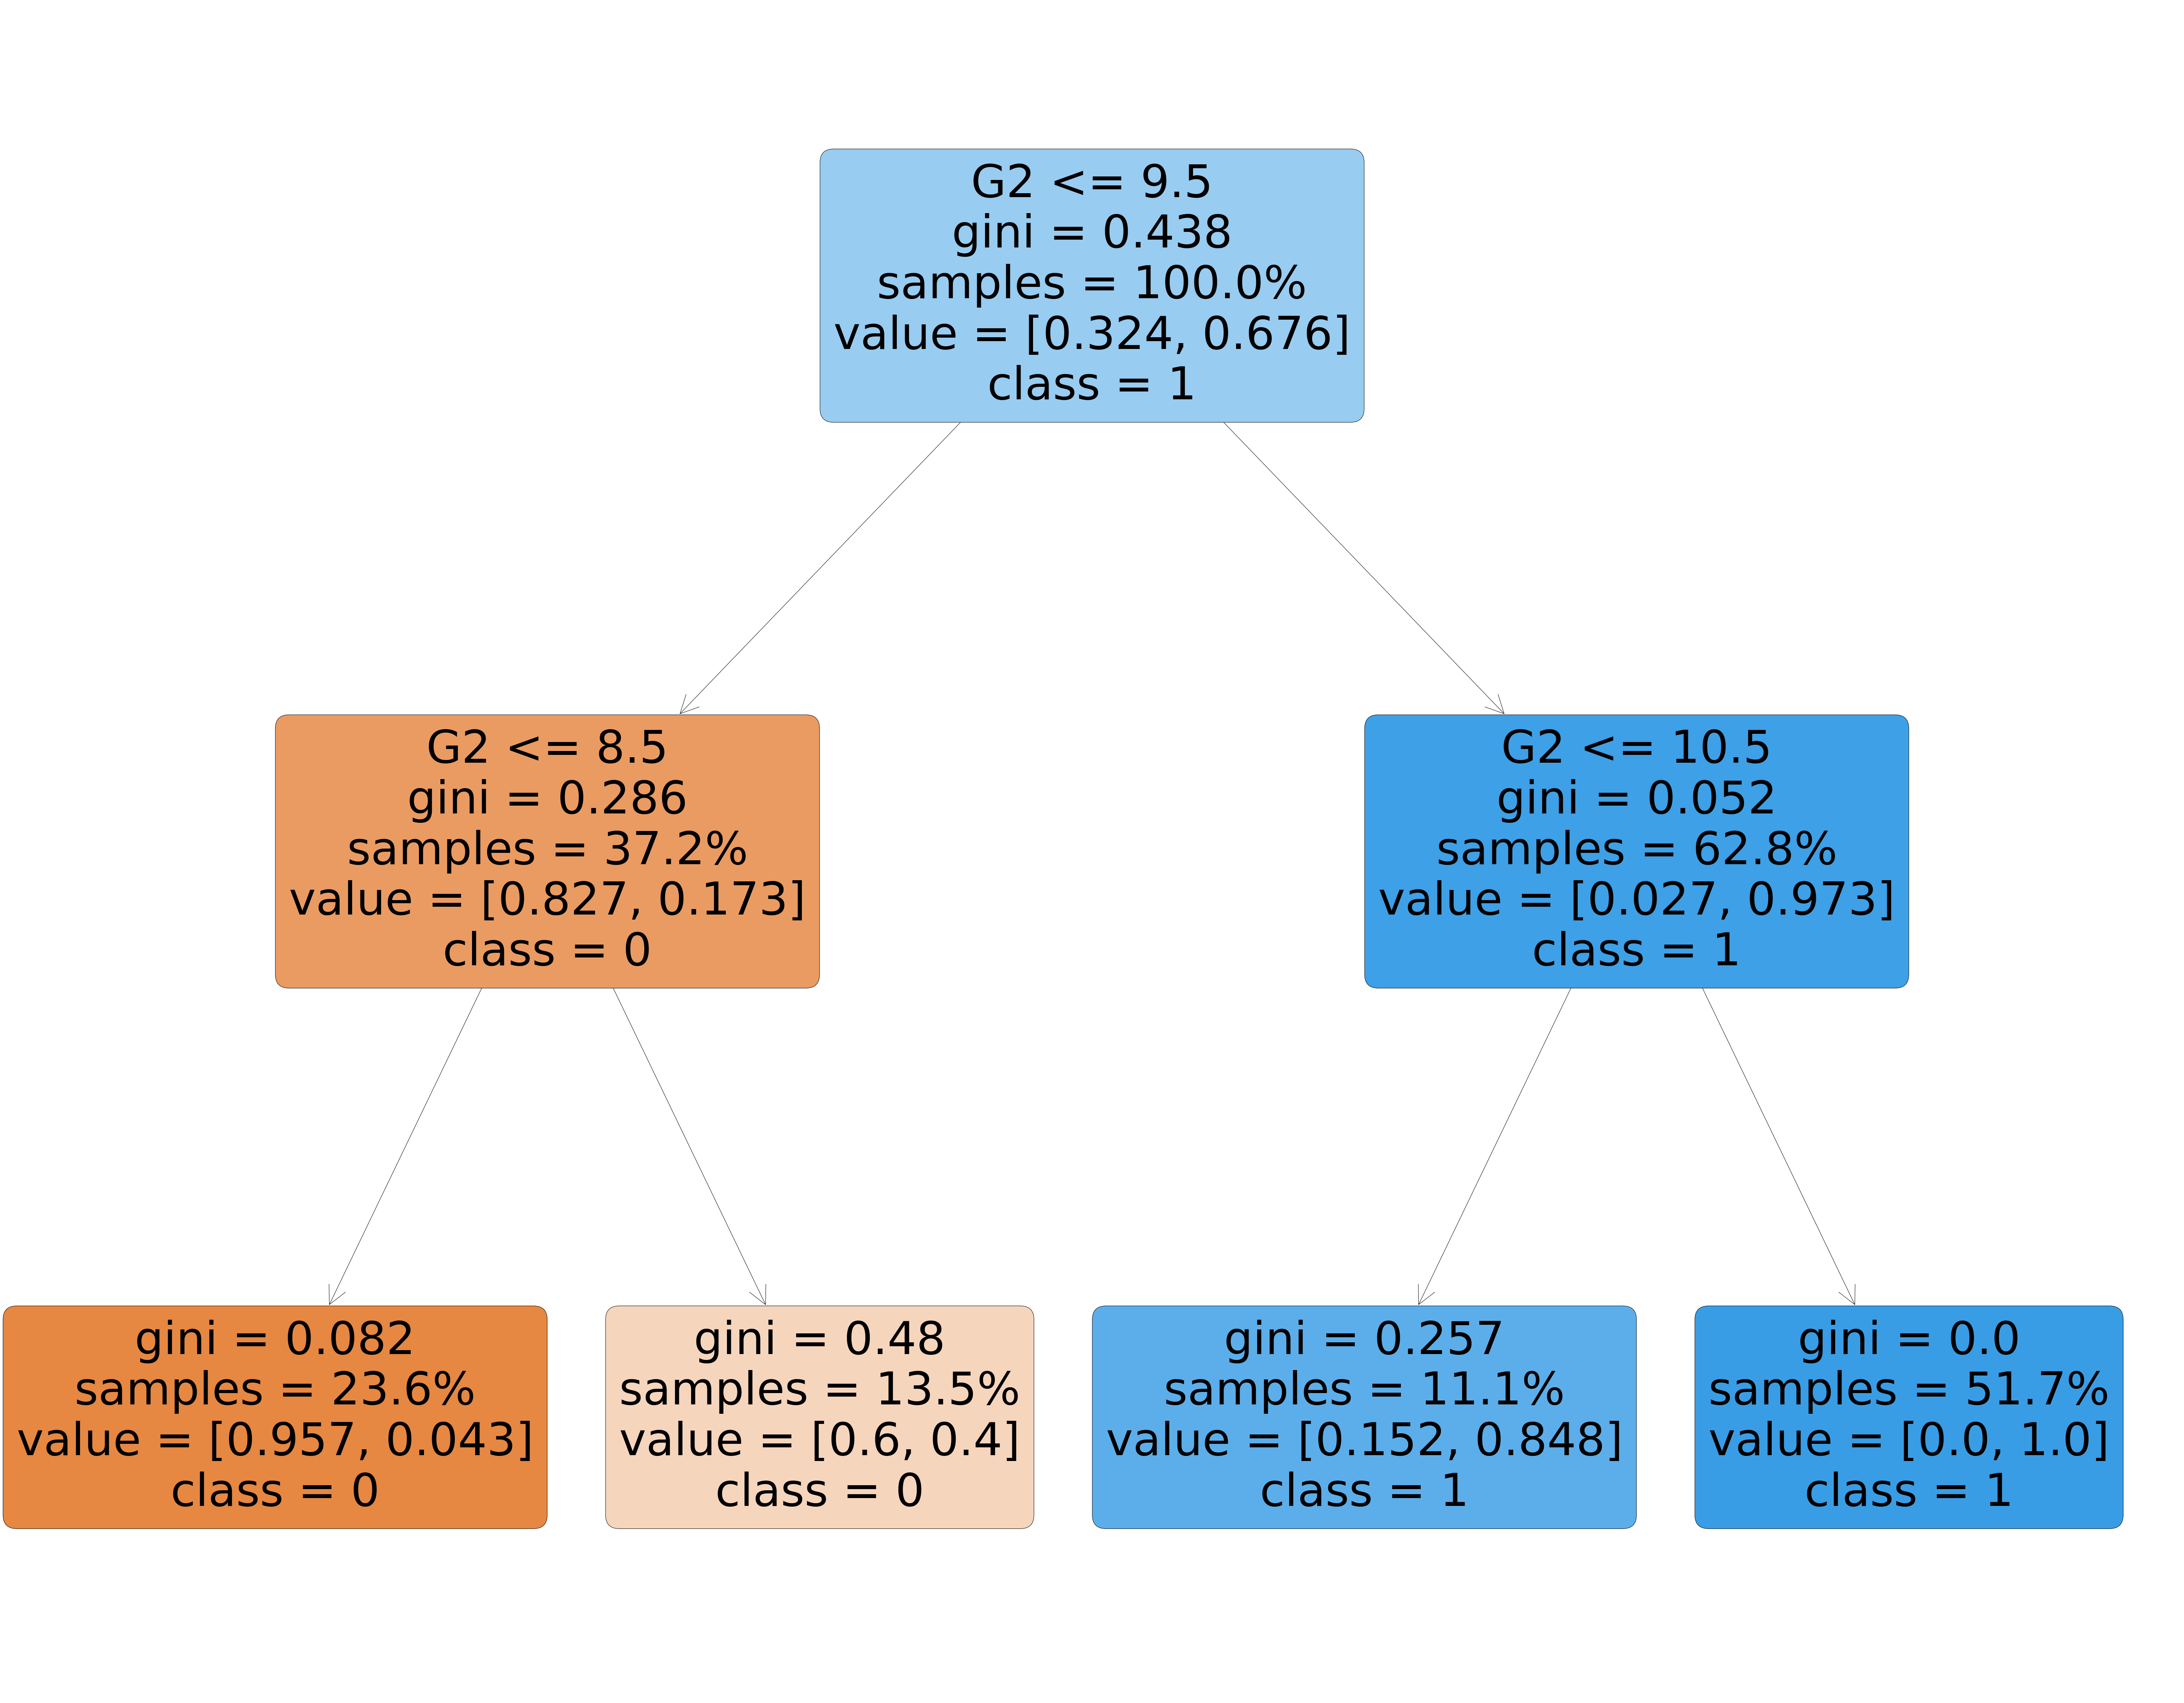

In [13]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
plt.figure(figsize=(100, 80))
plot_tree(dt,
          feature_names=feature_cols,
          class_names=['0','1'],
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True)
plt.show()

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# rf_parameters = {'n_estimators': (10, 20, 30, 50, 100, 150, 200, 250),
#                     'criterion': ('gini', 'entropy'),
#                     'max_depth': (None, 2, 3, 4, 5, 10, 15, 20)}
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3)
# gridCV = GridSearchCV(rf, rf_parameters)
# gridCV.fit(X_train, y_train)
# print(gridCV.best_params_)
rf.fit(X_train, y_train)
# y_pred_2 = dt.predict(X_test)


RandomForestClassifier(max_depth=3)

In [15]:
print(metrics.classification_report(y_test, y_pred_2))
print(metrics.confusion_matrix(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.95      0.92      0.94        65

    accuracy                           0.92        99
   macro avg       0.91      0.92      0.91        99
weighted avg       0.92      0.92      0.92        99

[[31  3]
 [ 5 60]]


In [33]:
rf.feature_importances_

array([0.31292203, 0.61487009, 0.03367728, 0.00675154, 0.03177906])

Built-In Feature Importance 

Text(0.5, 0, 'Random Forest Feature Importance')

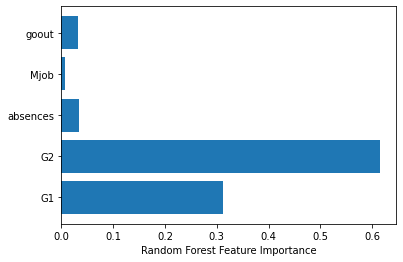

In [37]:
plt.barh(feature_cols, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

Permutation Based Feature Importance

In [39]:
from sklearn.inspection import permutation_importance 

perm_importance = permutation_importance(rf, X_test, y_test)


Text(0.5, 0, 'Random Forest Feature Importance')

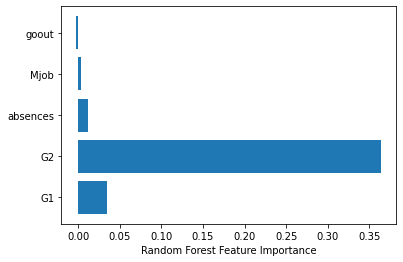

In [40]:
plt.barh(feature_cols, perm_importance.importances_mean)
plt.xlabel("Random Forest Feature Importance")

SHAP Feature Importance

In [44]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


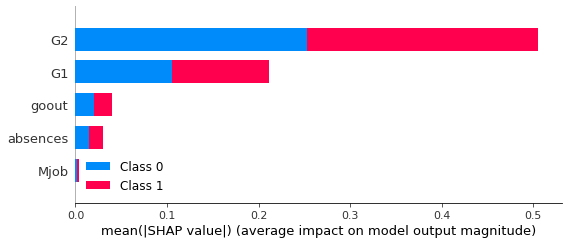

In [45]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


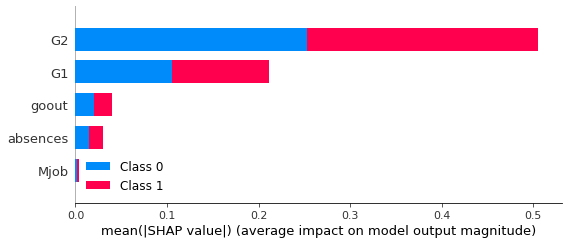

In [46]:
shap.summary_plot(shap_values, X_test)


### Results for Feature Set 1:

Optimal Hyperparameters -> n_estimators=100, criterion='gini', max_depth=3

Classification Report (weighted avg) -> precision=0.92, recall=0.92, f1=0.92



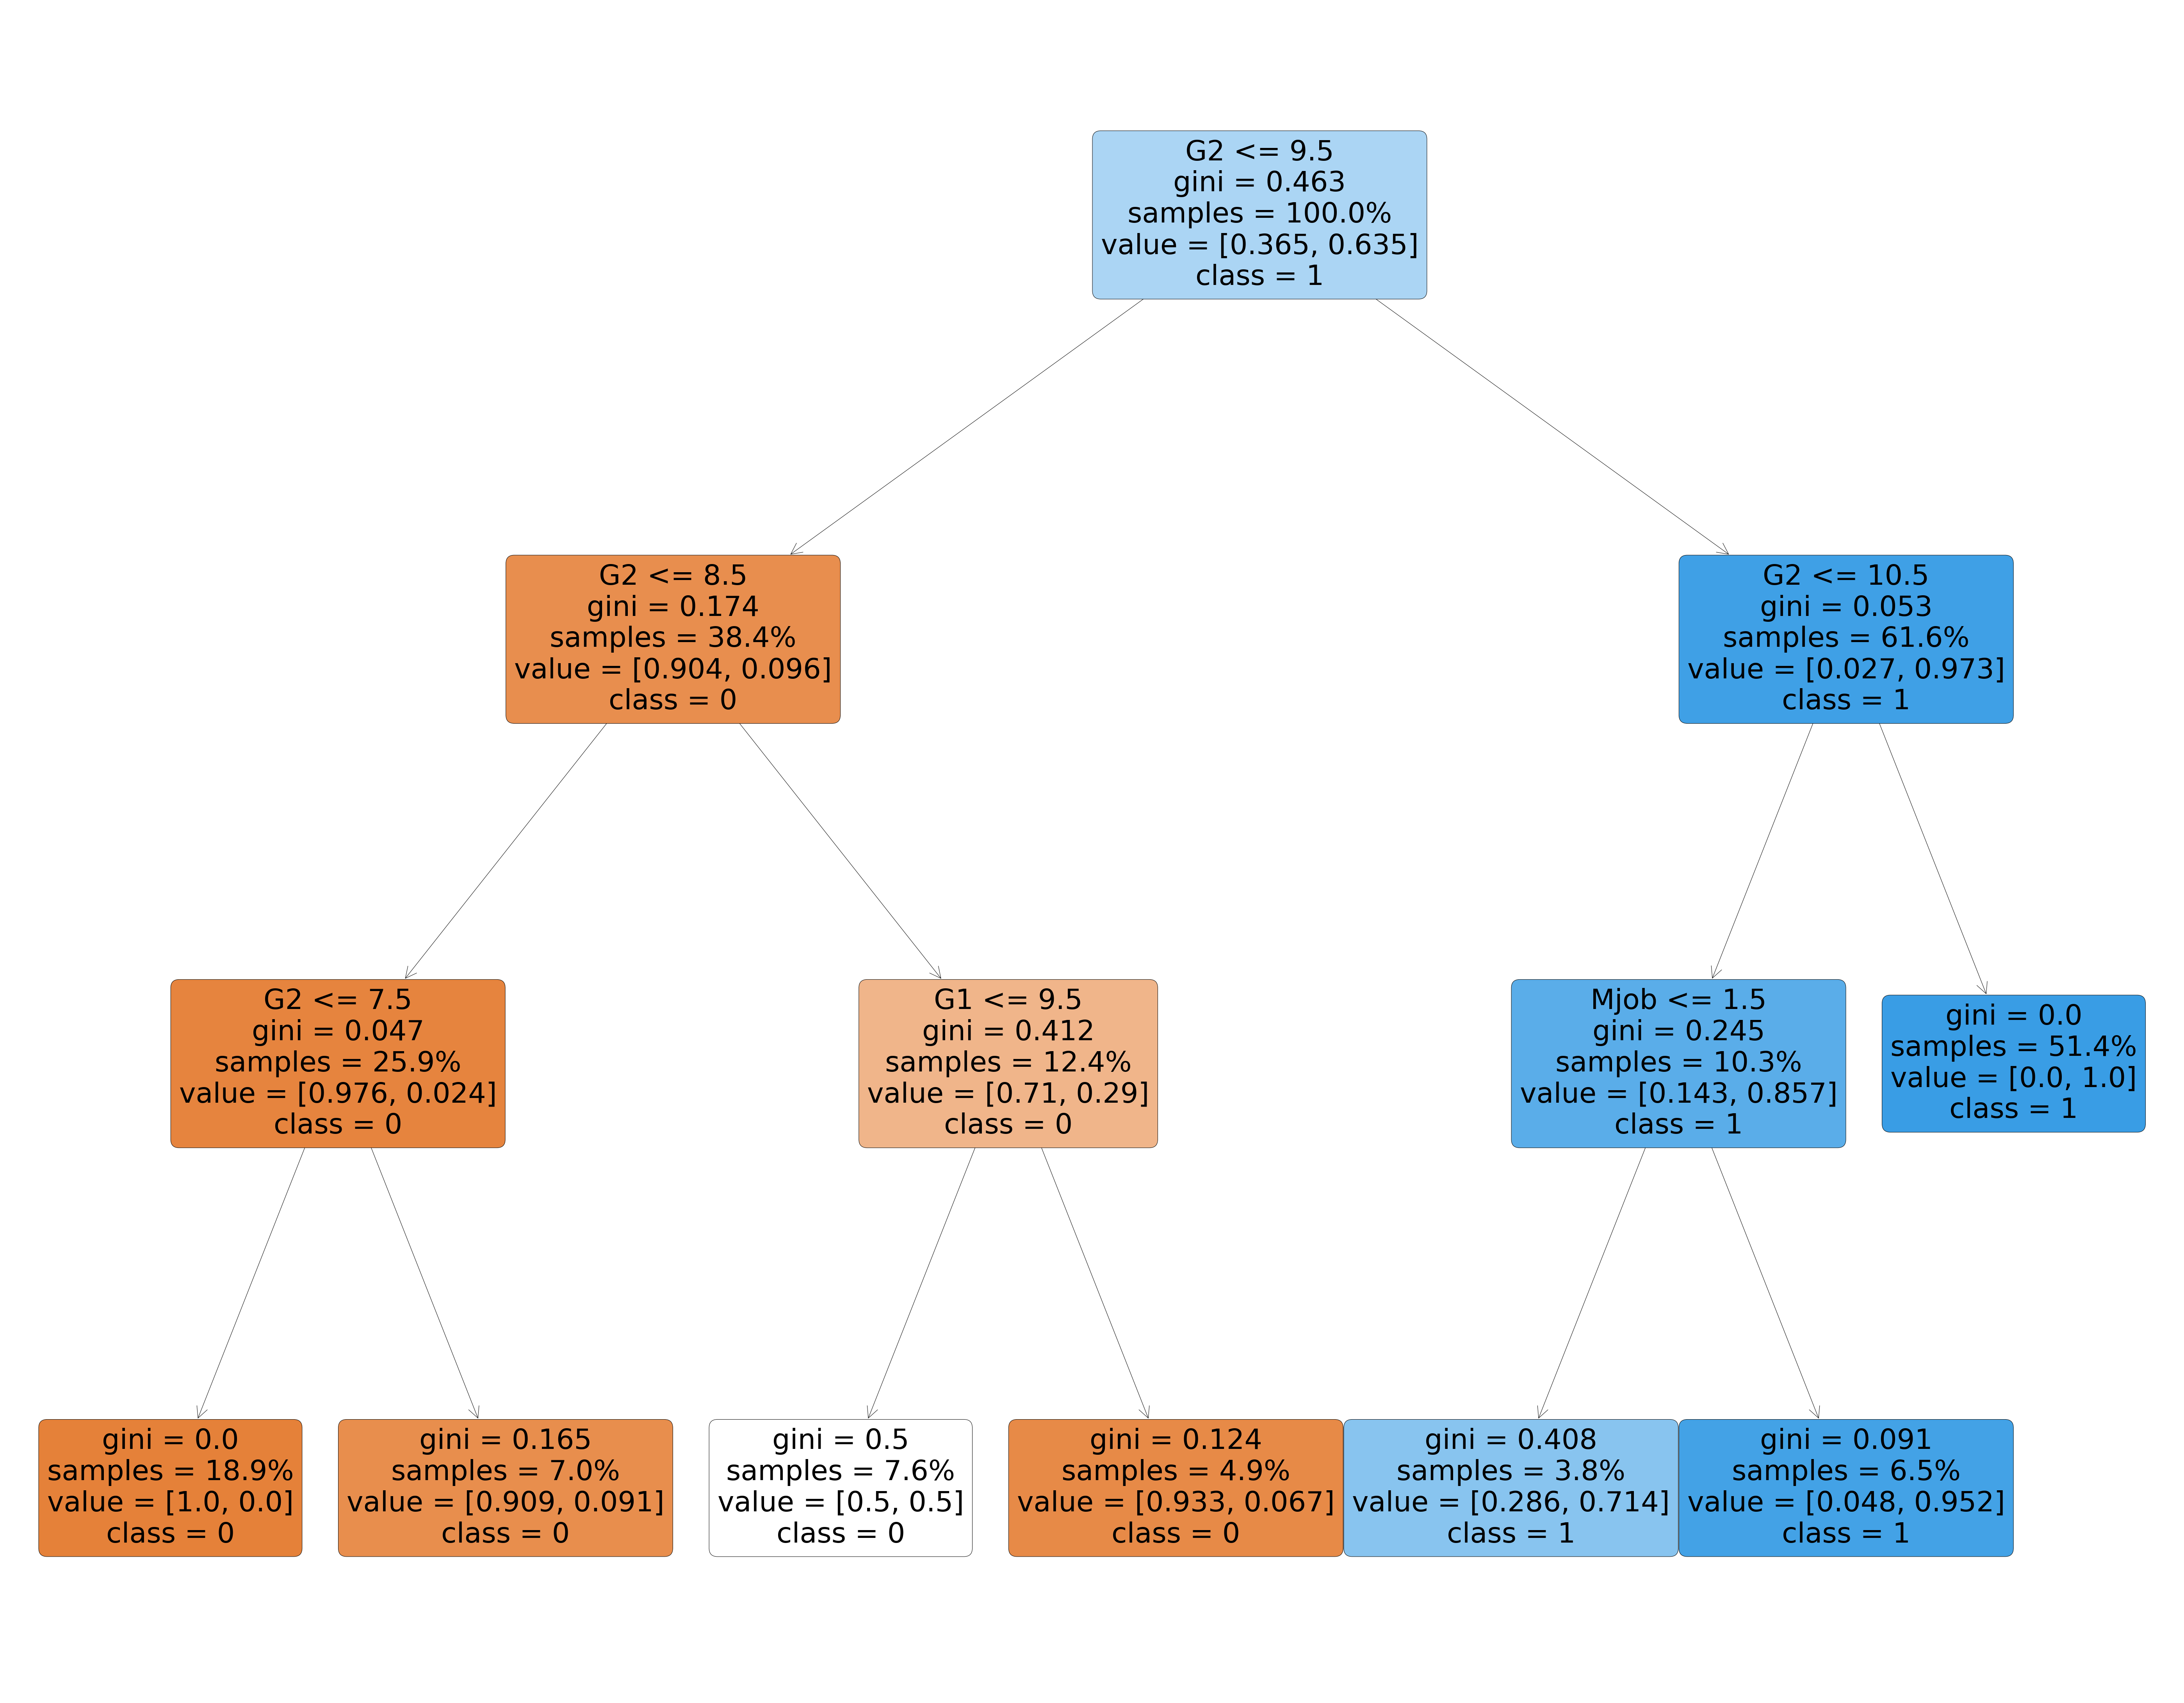

In [16]:
plt.figure(figsize=(100, 80))
plot_tree(rf.estimators_[5],
          feature_names=feature_cols,
          class_names=['0','1'],
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True)
plt.show()

### Performing LIME On Random Forest

In [59]:

import lime
import lime.lime_tabular

predict_fn_rf = lambda x: rf.predict_proba(X_test).astype(float)

In [63]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode="classification",
                                              class_names=['0', '1'],
                                              feature_names=feature_cols,
                                             )

In [83]:
import random
idx = random.randint(1, len(X_test-1))

exp = explainer.explain_instance(data_row=X_test.iloc[idx], predict_fn=rf.predict_proba,
                                         num_features=len(feature_cols))
exp.show_in_notebook()

In [84]:
exp.as_list()

[('G2 <= 9.00', -0.560035169834596),
 ('8.00 < G1 <= 11.00', -0.02968522391347078),
 ('goout <= 2.00', 0.020414971540517354),
 ('4.00 < absences <= 8.00', 0.016198136241497376),
 ('2.00 < Mjob <= 4.00', -0.009997448329189168)]

## Learned Vector Quantization

In [18]:

from sklvq import GLVQ
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = GLVQ(
        distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 20, "step_size": 0.1},
)



In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.25)

In [21]:
model.fit(X2_train, y2_train)

GLVQ(activation_params={'beta': 2}, activation_type='swish',
     solver_params={'max_runs': 20, 'step_size': 0.1})

In [22]:
y_pred_3 = model.predict(X2_test)
print(classification_report(y2_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.91      0.93      0.92        68

    accuracy                           0.89        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.89      0.89      0.89        99



Visualizing Prototypes of LVQ

Returns model prototypes / quantized vectors as values in array

In [25]:
model.get_model_params()

array([[-1.18834701, -2.02583045,  0.18969418,  0.10565937,  0.16711838],
       [ 0.07864445,  1.16935879,  0.11982348,  0.01441273, -0.12382841]])

In [26]:
model.get_params()

{'activation_params': {'beta': 2},
 'activation_type': 'swish',
 'discriminant_params': None,
 'discriminant_type': 'relative-distance',
 'distance_params': None,
 'distance_type': 'squared-euclidean',
 'force_all_finite': True,
 'prototype_init': 'class-conditional-mean',
 'prototype_n_per_class': 1,
 'random_state': None,
 'solver_params': {'max_runs': 20, 'step_size': 0.1},
 'solver_type': 'steepest-gradient-descent'}

In [27]:
model.get_prototypes()

array([[-1.18834701, -2.02583045,  0.18969418,  0.10565937,  0.16711838],
       [ 0.07864445,  1.16935879,  0.11982348,  0.01441273, -0.12382841]])

In [28]:
model.get_variables()

array([-1.18834701, -2.02583045,  0.18969418,  0.10565937,  0.16711838,
        0.07864445,  1.16935879,  0.11982348,  0.01441273, -0.12382841])

# Neural Networks MLP

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    verbose=True,
                    activation='relu',
                    learning_rate_init=0.01)

In [48]:
mlp.fit(X2_train, y2_train)

Iteration 1, loss = 1.65314207
Iteration 2, loss = 0.78149747
Iteration 3, loss = 0.43082768
Iteration 4, loss = 0.35517737
Iteration 5, loss = 0.35570893
Iteration 6, loss = 0.35073481
Iteration 7, loss = 0.33451909
Iteration 8, loss = 0.32889937
Iteration 9, loss = 0.32928201
Iteration 10, loss = 0.31954037
Iteration 11, loss = 0.31130442
Iteration 12, loss = 0.30030222
Iteration 13, loss = 0.27950894
Iteration 14, loss = 0.27543766
Iteration 15, loss = 0.26820966
Iteration 16, loss = 0.26362260
Iteration 17, loss = 0.25969509
Iteration 18, loss = 0.25575209
Iteration 19, loss = 0.25455277
Iteration 20, loss = 0.25052103
Iteration 21, loss = 0.25079112
Iteration 22, loss = 0.24929269
Iteration 23, loss = 0.24788170
Iteration 24, loss = 0.24497310
Iteration 25, loss = 0.24347240
Iteration 26, loss = 0.24433899
Iteration 27, loss = 0.24029335
Iteration 28, loss = 0.24063247
Iteration 29, loss = 0.23843120
Iteration 30, loss = 0.23672008
Iteration 31, loss = 0.23450429
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, verbose=True)

In [49]:
y_pred_mlp = mlp.predict(X2_test)

In [50]:
print(classification_report(y_pred_mlp, y2_test))

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        15
           1       0.97      0.91      0.94       148

    accuracy                           0.89       163
   macro avg       0.71      0.82      0.74       163
weighted avg       0.92      0.89      0.90       163

